In [7]:
def read_data(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[1]))
                constant = float(parts[2])
                y = float(parts[3])
                if x < 300:
                    x_values.append(x + constant)
                    y_values.append(y)

    return x_values, y_values

In [8]:
def read_dataMore300(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[1]))
                constant = float(parts[2])
                y = float(parts[3])
                if x > 300:
                    x_values.append(x + constant)
                    y_values.append(y)

    return x_values, y_values

In [9]:
def read_dataAtlas(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[0]))
                y = float(parts[3])
                if x > 300:
                    x_values.append(x)
                    y_values.append(y)

    return x_values, y_values

In [10]:
def read_dataAtlasless300(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[0]))
                y = float(parts[3])
                if x < 300:
                    x_values.append(x)
                    y_values.append(y)

    return x_values, y_values

In [11]:
def read_dataAtlas_complete(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[0]))
                y = float(parts[3])
                x_values.append(x)
                y_values.append(y)

    return x_values, y_values

In [34]:
def graficador(alpha56, x_atlasc, y_atlasc, filtered_x_less_300, filtered_y_less_300, filtered_x_more_300, filtered_y_more_300, porcentaje_salta,
    porcentaje_baja):
    # Filter the data to include only points where x > 10
    x_atlasc_filtered = [x for x in x_atlasc if x > 10]
    y_atlasc_filtered = [y for x, y in zip(x_atlasc, y_atlasc) if x > 10]

    filtered_x_less_300_filtered = [x for x in filtered_x_less_300 if x > 10]
    filtered_y_less_300_filtered = [y for x, y in zip(filtered_x_less_300, filtered_y_less_300) if x > 10]

    filtered_x_more_300_filtered = [x for x in filtered_x_more_300 if x > 10]
    filtered_y_more_300_filtered = [y for x, y in zip(filtered_x_more_300, filtered_y_more_300) if x > 10]
    # Plotting the data
    # Plotting the data
    plt.figure(figsize=(10, 6))

    porcentaje_salta= str(porcentaje_salta)

    porcentaje_baja= str(porcentaje_baja)
    # Split the string into words
    words = list(porcentaje_baja)

    #print(words)

    # Join the first three words back into a string
    shortened_porcentaje_baja = words[:3]

    words = list(porcentaje_salta)

    # Join the first three words back into a string
    shortened_porcentaje_salta = words[:3]

    shortened_porcentaje_salta = ''.join(shortened_porcentaje_salta)

    shortened_porcentaje_baja = ''.join(shortened_porcentaje_baja)

    #print(shortened_porcentaje_salta)

    # Scatter plot for each data set
    plt.scatter(x_atlasc_filtered, y_atlasc_filtered, alpha=0.5, label='Atlas C Data Points', color='red', marker='o')
    plt.scatter(filtered_x_less_300_filtered, filtered_y_less_300_filtered, alpha=0.5, label=f'Filtered X < 300 ({shortened_porcentaje_baja}%)', color='blue', marker='x')
    plt.scatter(filtered_x_more_300_filtered, filtered_y_more_300_filtered, alpha=0.5, label=f'Filtered X > 300 ({shortened_porcentaje_salta}%)', color='green', marker='x')

    # Add horizontal and vertical lines
    plt.axhline(y=0.1, color='black', linestyle='-')
    plt.axvline(x=300, color='black', linestyle='-')

    # Set log scale for both axes
    plt.xscale('log')
    plt.yscale('log')

    # Set labels and title
    plt.xlabel('delta z atlas')
    plt.ylabel(f'Error (no porcentual) deltaz atlas vs deltaz simple alpha56 -> {alpha56}')
    plt.title('Scatter Plot of X and Y Values (Log Scale)')

    # Show legend
    plt.legend(fontsize=12)

    # Show grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Save the plot to a file with higher quality
    plt.savefig(f'scatter_plot_combined{alpha56}.png', format='png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

PORCENTAJESaltavalla4 3.262642740619902
PORCENTAJEBajavalla4 1.3729508196721312
['1', '.', '3', '7', '2', '9', '5', '0', '8', '1', '9', '6', '7', '2', '1', '3', '1', '2']
3.2


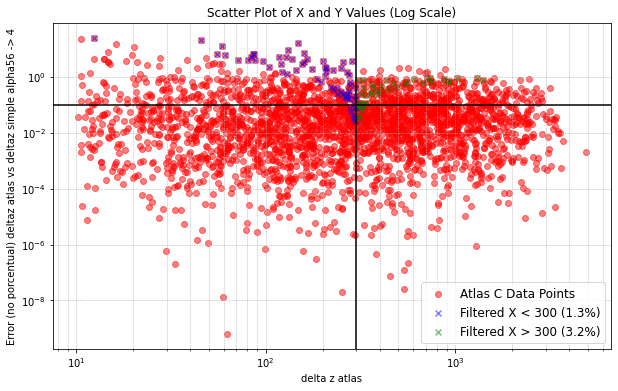

PORCENTAJESaltavalla5 2.678062678062678
PORCENTAJEBajavalla5 1.5690168818272097
['1', '.', '5', '6', '9', '0', '1', '6', '8', '8', '1', '8', '2', '7', '2', '0', '9', '7']
2.6


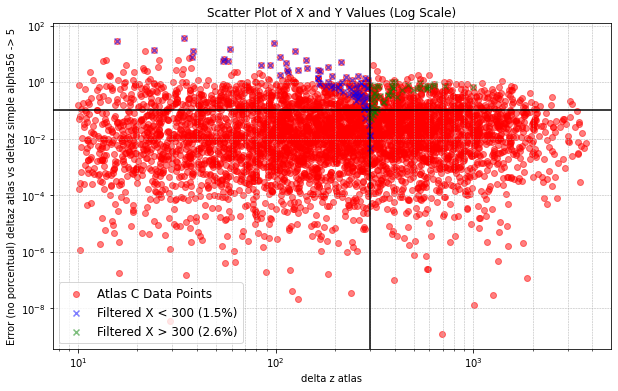

PORCENTAJESaltavalla6 2.503912363067293
PORCENTAJEBajavalla6 0.8144946808510639
['0', '.', '8', '1', '4', '4', '9', '4', '6', '8', '0', '8', '5', '1', '0', '6', '3', '9']
2.5


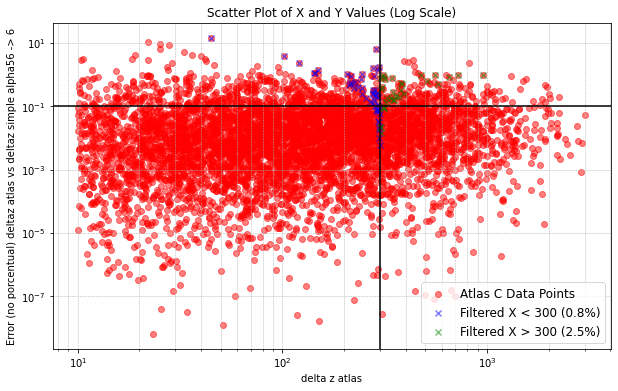

In [35]:
import matplotlib.pyplot as plt
import os
import numpy as np

for number_alpha56 in [4, 5, 6]:
    # Read the data from both files
    file_path_pt = f'eta_histoconstant{number_alpha56}.txt'

    #obtenemos los valores menores de 300
    x_values, y_values = read_data(file_path_pt)

    # Filter data where x_values are greater than 300
    filtered_x = [x for x in x_values if x > 300]
    filtered_y = [y for x, y in zip(x_values, y_values) if x > 300]

    filtered_x_more_300 = filtered_x
    filtered_y_more_300 = filtered_y

    

    x_values, y_values = read_dataMore300(file_path_pt)

    filtered_x = [x for x in x_values if x < 300]
    filtered_y = [y for x, y in zip(x_values, y_values) if x < 300]

    filtered_x_less_300 = filtered_x
    filtered_y_less_300 = filtered_y

    x_atlasc, y_atlasc = read_dataAtlas_complete(file_path_pt)

    filtered_x_atlas_more_300 = [x for x in x_atlasc if x > 300]

    filtered_x_atlas_less_300 = [x for x in x_atlasc if x < 300]

    porcentaje_salta = (len(filtered_x_more_300)/len(filtered_x_atlas_more_300))*100
    print(f"PORCENTAJESaltavalla{number_alpha56}", porcentaje_salta)

    porcentaje_baja = (len(filtered_x_less_300)/len(filtered_x_atlas_less_300))*100
    print(f"PORCENTAJEBajavalla{number_alpha56}", porcentaje_baja)

    graficador(
    number_alpha56,
    x_atlasc,
    y_atlasc,
    filtered_x_less_300,
    filtered_y_less_300,
    filtered_x_more_300,
    filtered_y_more_300,
    porcentaje_salta,
    porcentaje_baja
    )



    

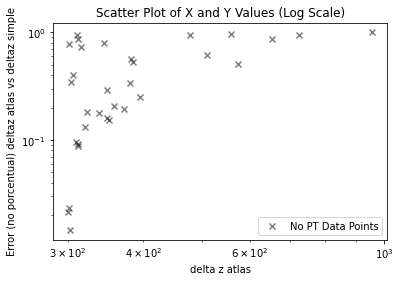

In [32]:
x , y = x_values, y_values
# Filter data where x_values are greater than 300
filtered_x = [x for x in x_values if x > 300]
filtered_y = [y for x, y in zip(x_values, y_values) if x > 300]

filtered_x_more_300 = filtered_x
filtered_y_more_300 = filtered_y

#print(100*(len(filtered_x))/len(x))
# Plotting the filtered data
# Plot data from eta_histo_no_pt.txt with cross symbols
plt.scatter(filtered_x, filtered_y, alpha=0.5, label='No PT Data Points', color='black', marker='x')

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('delta z atlas')
plt.ylabel('Error (no porcentual) deltaz atlas vs deltaz simple')
plt.title('Scatter Plot of X and Y Values (Log Scale)')

# Show legend
plt.legend()

In [33]:
file_path_no_pt = 'eta_histoconstant.txt'

x_atlas, y_atlas = read_dataAtlas(file_path_no_pt)

porcentaje = len(filtered_x)/len(x_atlas)*100
print(porcentaje)

2.503912363067293


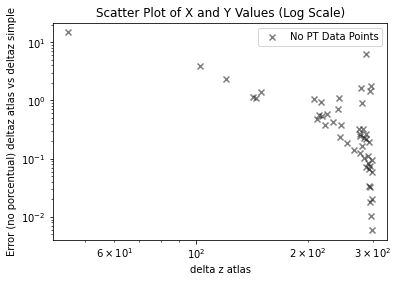

In [34]:
file_path_no_pt = 'eta_histoconstant.txt'

x_more300, y_more300 = read_dataMore300(file_path_no_pt)

filtered_x = [x for x in x_more300 if x < 300]
filtered_y = [y for x, y in zip(x_more300, y_more300) if x < 300]

filterex_x_less_300 = filtered_x
filtered_y_less_300 = filtered_y


#print(100*(len(filtered_x))/len(x))
# Plotting the filtered data
# Plot data from eta_histo_no_pt.txt with cross symbols
plt.scatter(filtered_x, filtered_y, alpha=0.5, label='No PT Data Points', color='black', marker='x')

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('delta z atlas')
plt.ylabel('Error (no porcentual) deltaz atlas vs deltaz simple')
plt.title('Scatter Plot of X and Y Values (Log Scale)')

# Show legend
plt.legend()


In [36]:
file_path_no_pt = 'eta_histoconstant.txt'

x_atlas, y_atlas = read_dataAtlasless300(file_path_no_pt)

#print(len(x_atlas))
#print(len(filterex_x_less_300))

porcentaje = len(filterex_x_less_300)/len(x_atlas)*100
print(porcentaje)

0.8144946808510639


In [38]:
file_path_no_pt = 'eta_histoconstant.txt'

x_atlasc, y_atlasc = read_dataAtlas_complete(file_path_no_pt)

# x_atlasc vs y_atlasc
#filterex_x_less_300 vs filtered_y_less_300
#filtered_x_more_300 vs filtered_y_more_300

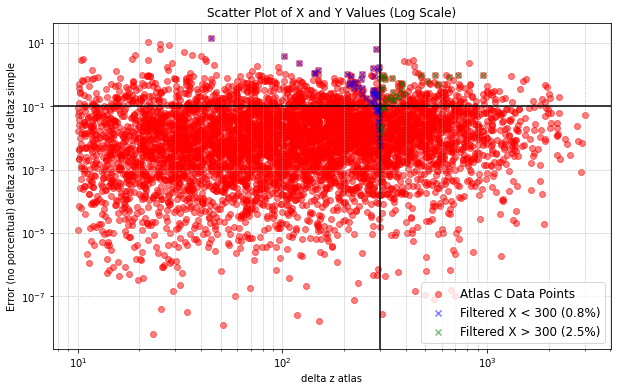

In [51]:
# Filter the data to include only points where x > 10
x_atlasc_filtered = [x for x in x_atlasc if x > 10]
y_atlasc_filtered = [y for x, y in zip(x_atlasc, y_atlasc) if x > 10]

filtered_x_less_300_filtered = [x for x in filterex_x_less_300 if x > 10]
filtered_y_less_300_filtered = [y for x, y in zip(filterex_x_less_300, filtered_y_less_300) if x > 10]

filtered_x_more_300_filtered = [x for x in filtered_x_more_300 if x > 10]
filtered_y_more_300_filtered = [y for x, y in zip(filtered_x_more_300, filtered_y_more_300) if x > 10]
# Plotting the data
# Plotting the data
plt.figure(figsize=(10, 6))

# Scatter plot for each data set
plt.scatter(x_atlasc_filtered, y_atlasc_filtered, alpha=0.5, label='Atlas C Data Points', color='red', marker='o')
plt.scatter(filtered_x_less_300_filtered, filtered_y_less_300_filtered, alpha=0.5, label='Filtered X < 300 (0.8%)', color='blue', marker='x')
plt.scatter(filtered_x_more_300_filtered, filtered_y_more_300_filtered, alpha=0.5, label='Filtered X > 300 (2.5%)', color='green', marker='x')

# Add horizontal and vertical lines
plt.axhline(y=0.1, color='black', linestyle='-')
plt.axvline(x=300, color='black', linestyle='-')

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('delta z atlas')
plt.ylabel('Error (no porcentual) deltaz atlas vs deltaz simple')
plt.title('Scatter Plot of X and Y Values (Log Scale)')

# Show legend
plt.legend(fontsize=12)

# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save the plot to a file with higher quality
plt.savefig('scatter_plot_combined.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

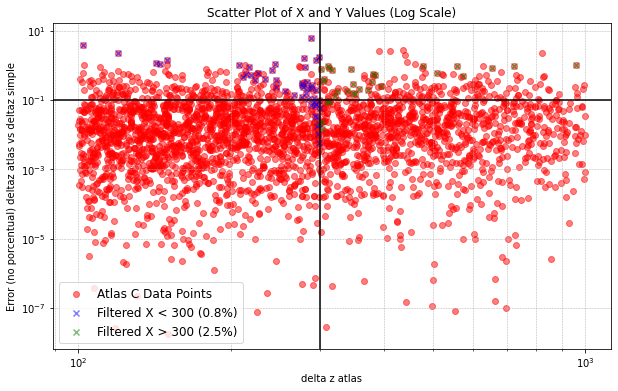

In [49]:
# Filter the data to include only points where x > 10
x_atlasc_filtered = [x for x in x_atlasc if 100 < x < 1000]
y_atlasc_filtered = [y for x, y in zip(x_atlasc, y_atlasc) if 100 < x < 1000]

filtered_x_less_300_filtered = [x for x in filterex_x_less_300 if 100 < x < 1000]
filtered_y_less_300_filtered = [y for x, y in zip(filterex_x_less_300, filtered_y_less_300) if 100 < x < 1000]

filtered_x_more_300_filtered = [x for x in filtered_x_more_300 if 100 < x < 1000]
filtered_y_more_300_filtered = [y for x, y in zip(filtered_x_more_300, filtered_y_more_300) if 100 < x < 1000]
# Plotting the data
# Plotting the data
plt.figure(figsize=(10, 6))

# Scatter plot for each data set
plt.scatter(x_atlasc_filtered, y_atlasc_filtered, alpha=0.5, label='Atlas C Data Points', color='red', marker='o')
plt.scatter(filtered_x_less_300_filtered, filtered_y_less_300_filtered, alpha=0.5, label='Filtered X < 300 (0.8%)', color='blue', marker='x')
plt.scatter(filtered_x_more_300_filtered, filtered_y_more_300_filtered, alpha=0.5, label='Filtered X > 300 (2.5%)', color='green', marker='x')

# Add horizontal and vertical lines
plt.axhline(y=0.1, color='black', linestyle='-')
plt.axvline(x=300, color='black', linestyle='-')

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel('delta z atlas')
plt.ylabel('Error (no porcentual) deltaz atlas vs deltaz simple')
plt.title('Scatter Plot of X and Y Values (Log Scale)')

# Show legend
plt.legend(fontsize=12)

# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Save the plot to a file with higher quality
plt.savefig('scatter_plot_combined.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()